# Pandas Data
Pandas 를 이용해 Data 를 가공하는 법을 알아봅니다.

## Import
보통 pd 로 많이 사용합니다.

In [ ]:
import pandas as pd

version 확인

In [ ]:
pd.__version__

'1.1.5'

## Data 를 가져오기


### 데이터 다운로드

In [ ]:
!wget https://github.com/Finfra/TensorflowStudyExample/raw/master/data/example.csv

--2021-08-29 08:50:10--  https://github.com/Finfra/TensorflowStudyExample/raw/master/data/example.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Finfra/TensorflowStudyExample/master/data/example.csv [following]
--2021-08-29 08:50:10--  https://raw.githubusercontent.com/Finfra/TensorflowStudyExample/master/data/example.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61 [text/plain]
Saving to: ‘example.csv’

example.csv         100%[===================>]      61  --.-KB/s    in 0s      

2021-08-29 08:50:11 (2.69 MB/s) - ‘example.csv’ saved [61/61]



### 구글 드라이브를 더 잘 붙어 있게 해주는 방법

In [ ]:
from google.colab import drive
isMount=!df |grep /content/drive
if len(isMount) < 1 : drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


%cd 로 움직여서 그 위치에 있도록 도와준다.

In [ ]:
# %cd /gdrive/My Drive/PracticeProject/1st_MLP_easy
# !ls

### CSV 데이터 읽어오기

In [ ]:
df = pd.read_csv("./example.csv")
df

,a,b,c,d,e
0,1,2,3,4,5
1,6,1,2,3,4
2,7,8,9,0,9
3,4,5,6,7,8
4,11,13,8,5,5


## Data 분석하기

### countplot
답변 갯수가 불균형적이거나 하는 것을 찾을 때 쓰면 좋다.<BR>


In [ ]:
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
import seaborn as sns
from sklearn.metrics import roc_auc_score

In [ ]:
financial = pd.read_csv("./example.csv")
add_col = ['좋아', '싫어', '싫어','싫어', '싫어']
financial['say'] = add_col
financial

,a,b,c,d,e,say
0,1,2,3,4,5,좋아
1,6,1,2,3,4,싫어
2,7,8,9,0,9,싫어
3,4,5,6,7,8,싫어
4,11,13,8,5,5,싫어


싫어    4
좋아    1
Name: say, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51339 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49899 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51339 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_te

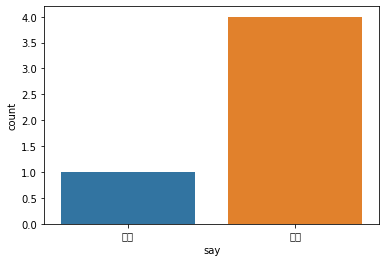

In [ ]:
print(financial["say"].value_counts())
sns.countplot(financial["say"])

## Data 를 가공하기

### 특정조건으로 데이터를 정렬하기

In [ ]:
df.sort_values(by=["d"])

,a,b,c,d,e
2,7,8,9,0,9
1,6,1,2,3,4
0,1,2,3,4,5
4,11,13,8,5,5
3,4,5,6,7,8


### DROP 을 통해 데이터 없애기
inplace 옵션을 True 를 주면 자체 데이터에 바로 영향을 주고 False 를 하게 되면 해당 데이터에는 영향을 미치지 않는다.<BR>
(False 로 하고 다른 Dataframe 에 담는 것을 추천한다.)

In [ ]:
drop_df = df.drop(['e'], axis=1, inplace=False)
drop_df

,a,b,c,d
0,1,2,3,4
1,6,1,2,3
2,7,8,9,0
3,4,5,6,7
4,11,13,8,5


### 열 추가하기

In [ ]:
add_col = ['좋아', '가는', '거야','신나', '좋아']
df['say'] = add_col
df

,a,b,c,d,e,say
0,1,2,3,4,5,좋아
1,6,1,2,3,4,가는
2,7,8,9,0,9,거야
3,4,5,6,7,8,신나
4,11,13,8,5,5,좋아


### 행 추가하기

append 를 이용한 행 데이터 추가<BR>
(Index 가 간혹 int 형태로 들어가서 깨지는 경우가 있다.)

In [ ]:
new_data = {'a':2, 'b' : 3, 'c' : 4, 'd' : 8, 'e' : 3, 'say' : '슬퍼'}
ef = df.append(new_data, ignore_index=True)
ef

,a,b,c,d,e,say
0,1,2,3,4,5,좋아
1,6,1,2,3,4,가는
2,7,8,9,0,9,거야
3,4,5,6,7,8,신나
4,11,13,8,5,5,좋아
5,2,3,4,8,3,슬퍼


아예 index를 지정한 데이터를 추가하는 방법이 있다.<BR>
(중복되는 index가 생겨날 수 있으니 주의해야 한다.)

In [ ]:
ihave = [(4,5,3,4,2,'슬퍼')]
new_data = pd.DataFrame(ihave, columns=df.columns, index=[5])
ef = df.append(new_data)
ef

,a,b,c,d,e,say
0,1,2,3,4,5,좋아
1,6,1,2,3,4,가는
2,7,8,9,0,9,거야
3,4,5,6,7,8,신나
4,11,13,8,5,5,좋아
5,4,5,3,4,2,슬퍼


loc 을 이용한 추가<BR>
(Index 를 내가 지정하기 때문에 위와 마찬가지로 깨지지 않게 해줄 수 있다. 다만, 원래 존재하는 키를 지정하는 경우 업데이트가 되므로 주의가 필요하다.)

In [ ]:
df.loc[8]=[2, 3, 4, 8, 3, '이나']
df

,a,b,c,d,e,say
0,1,2,3,4,5,좋아
1,6,1,2,3,4,가는
2,7,8,9,0,9,거야
3,4,5,6,7,8,신나
4,11,13,8,5,5,좋아
8,2,3,4,8,3,이나


### Merge
Merge 함수를 통해 DBMS 의 Join 과 같은 효과를 가져올 수 있다.

In [ ]:
df1 = pd.DataFrame([["a","잘함","잘함"],["b","잘함","못함"],["c","못함","잘함"]], columns = ["이름","축구","농구"])
df1

,이름,축구,농구
0,a,잘함,잘함
1,b,잘함,못함
2,c,못함,잘함


In [ ]:
df2 = pd.DataFrame([["a","잘함"],["b","못함"],["d","잘함"]], columns = ["이름","배구"])
df2

,이름,배구
0,a,잘함
1,b,못함
2,d,잘함


#### Inner

In [ ]:
pd.merge( left = df1, right = df2, how = "inner", on = "이름")

,이름,축구,농구,배구
0,a,잘함,잘함,잘함
1,b,잘함,못함,못함


#### Left

In [ ]:
pd.merge(left = df1, right = df2, how = "left", on = "이름")

,이름,축구,농구,배구
0,a,잘함,잘함,잘함
1,b,잘함,못함,못함
2,c,못함,잘함,NaN


#### Right

In [ ]:
pd.merge(left = df1, right = df2, how = "right", on = "이름")

,이름,축구,농구,배구
0,a,잘함,잘함,잘함
1,b,잘함,못함,못함
2,d,NaN,NaN,잘함


#### Outer

In [ ]:
pd.merge(left = df1, right = df2, how = "outer", on = "이름")

,이름,축구,농구,배구
0,a,잘함,잘함,잘함
1,b,잘함,못함,못함
2,c,못함,잘함,NaN
3,d,NaN,NaN,잘함


#### Index 를 기준으로 합치기

In [ ]:
df1 = df1.set_index("이름")
df2 = df2.set_index("이름")
df2

,배구
이름,
a,잘함
b,못함
d,잘함


In [ ]:
pd.merge(left=df1, right=df2, left_index=True, right_index=True, how = "inner")

,축구,농구,배구
이름,,,
a,잘함,잘함,잘함
b,잘함,못함,못함


In [ ]:
pd.concat([df1,df2],axis =1, join="inner")

,축구,농구,배구
이름,,,
a,잘함,잘함,잘함
b,잘함,못함,못함


### Concat
여러개의 동일한 형태의 dataframe 을 합쳐준다.

In [ ]:
fi1 = pd.DataFrame([["A0","잘함","잘함","못함"],
                    ["A1","잘함","못함", "잘함"],
                    ["A2","못함","잘함", "못함"]]
                   , columns = ["fi1","fi2","fi3","fi4"])
fi2 = pd.DataFrame({'fi1': ['A3', 'A4', 'A5'],
                    'fi2': ['B3', 'B4', 'B5'],
                    'fi3': ['C3', 'C4', 'C5'],
                    'fi4': ['D3', 'D4', 'D5']},
                   index=[3, 4, 5])

In [ ]:
financial = pd.concat([fi1,fi2],axis=0, join='inner')
financial

,fi1,fi2,fi3,fi4
0,A0,잘함,잘함,못함
1,A1,잘함,못함,잘함
2,A2,못함,잘함,못함
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5


### 셔플링
sample 함수를 이용한 셔플링 방법. 간혹 인덱스가 꼬여 있으면 자료를 못 읽거나 이상하게 받아들일 수 있으므로 rest_index 를 꼭해줘야 한다.

In [ ]:
financial = financial.sample(frac=1)
financial

,fi1,fi2,fi3,fi4
1,A1,잘함,못함,잘함
5,A5,B5,C5,D5
4,A4,B4,C4,D4
3,A3,B3,C3,D3
0,A0,잘함,잘함,못함
2,A2,못함,잘함,못함


In [ ]:
financial = financial.reset_index(drop=True)
financial

,fi1,fi2,fi3,fi4
0,A1,잘함,못함,잘함
1,A5,B5,C5,D5
2,A4,B4,C4,D4
3,A3,B3,C3,D3
4,A0,잘함,잘함,못함
5,A2,못함,잘함,못함


### replace
pandas 데이터를 받아들일 때 float 형태여야 하기 때문에 글자 형태인 것을 바꿔준다.

In [ ]:
financial = pd.read_csv("./example.csv")
add_col = ['좋아', '싫어', '싫어','싫어', '좋아']
financial['say'] = add_col
financial['say'].unique()

array(['좋아', '싫어'], dtype=object)

In [ ]:
change_dict3 = {'좋아': 1., '싫어': 0.}
financial = financial.replace({"say" : change_dict3})
financial

,a,b,c,d,e,say
0,1,2,3,4,5,1.0
1,6,1,2,3,4,0.0
2,7,8,9,0,9,0.0
3,4,5,6,7,8,0.0
4,11,13,8,5,5,1.0


### One hot encoding
1, 3, 4, 6, 7, 8 이런 식의 숫자가 반복된다면 그것의 강도를 머신이 정확히 알 수 없을 수 있다. 그래서 one hot encoding 을 통해 정확하게 만들어준다.

In [ ]:
financial["d"].unique()

array([4, 3, 0, 7, 5])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
# enc.fit(.reshqpe(-1,1))
temp2 = pd.get_dummies(financial["d"])
temp2

,0,3,4,5,7
0,0,0,1,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,0,0,0,1
4,0,0,0,1,0


In [ ]:
financial = pd.concat([financial,temp2],axis=1, join='inner')
financial

,a,b,c,d,e,say,0,3,4,5,7
0,1,2,3,4,5,1.0,0,0,1,0,0
1,6,1,2,3,4,0.0,0,1,0,0,0
2,7,8,9,0,9,0.0,1,0,0,0,0
3,4,5,6,7,8,0.0,0,0,0,0,1
4,11,13,8,5,5,1.0,0,0,0,1,0


In [ ]:
financial = financial.drop(["d"], axis=1, inplace=False)
financial

,a,b,c,e,say,0,3,4,5,7
0,1,2,3,5,1.0,0,0,1,0,0
1,6,1,2,4,0.0,0,1,0,0,0
2,7,8,9,9,0.0,1,0,0,0,0
3,4,5,6,8,0.0,0,0,0,0,1
4,11,13,8,5,1.0,0,0,0,1,0


## Correlation
[Pearson Correlation Coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)를 구할 수 있는 corr(), corrwith() 함수를 제공합니다. 이들 함수를 groupby() 와 apply(lambda func)를 함께 사용함으로써 그룹 별 변수 간 상관계수를 구할 수 있습니다. 

출처:  [R, Python 분석과 프로그래밍의 친구 (by R Friend)](https://rfriend.tistory.com/405)

In [ ]:
lst = [[1,2,3,4,5,6,7],
        [10,15,20,25,50,55,60],
        [0,0,0,0,0,0,0],
        [-1,-20,-30,-45,-50,-55,-70]]

df = pd.DataFrame(lst).T
corr = df.corr(method = 'pearson')
print(corr)

print(corr.index[abs(corr[3])>=0.45])

          0         1   2         3
0  1.000000  0.966282 NaN -0.983120
1  0.966282  1.000000 NaN -0.917002
2       NaN       NaN NaN       NaN
3 -0.983120 -0.917002 NaN  1.000000
Int64Index([0, 1, 3], dtype='int64')


## Normalization
데이터가 가진 feature의 스케일이 심하게 차이가 나는 경우 문제가 되기 때문에 모든 데이터 포인트가 동일한 정도의 스케일(중요도)로 반영되도록 해주는 게 정규화(Normalization)의 목표이다.

출처. [아무튼 워라벨](http://hleecaster.com/ml-normalization-concept/)

### Basic

In [ ]:
def norm(x):
  _max = x.max()
  _min = x.min()
  _denom = _max - _min
  return (x - _min) / _denom

### Pandas

In [ ]:
from sklearn.preprocessing import MinMaxScaler
lst = [[1,2,3,4,5,6,7],
        [10,15,20,25,50,55,60],
        [0,0,0,0,0,0,0],
        [-1,-20,-30,-45,-50,-55,-70]]
df = lst
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(df)
print(fitted.data_max_, fitted.data_min_)

output = min_max_scaler.transform(df)
print(output)

[10. 15. 20. 25. 50. 55. 60.] [ -1. -20. -30. -45. -50. -55. -70.]
[[0.18181818 0.62857143 0.66       0.7        0.55       0.55454545
  0.59230769]
 [1.         1.         1.         1.         1.         1.
  1.        ]
 [0.09090909 0.57142857 0.6        0.64285714 0.5        0.5
  0.53846154]
 [0.         0.         0.         0.         0.         0.
  0.        ]]
